# 神经网络基本原理-1

## 1 梯度下降法

### 1.1 线性回归模型中的梯度下降法

对于以下1-1现行回归模型 $\mathbf{y}=w\mathbf{x}$

![ANN1](./14-L7-Neural-network/SimpleANN01.png)

输入量：$\mathbf{x}$ 

权重：$w$ 

预测值：$\mathbf{y}$ 

目标值:  $\mathbf{t}$ 

数学建模目标：预测值$\mathbf{y}$尽可能接近目标值$\mathbf{t}$

量化评估标准：损失函数$L=||\mathbf{y}-\mathbf{t}||_2$

本小节训练神经网络利用梯度下降法寻找损失函数的极小值。

In [19]:
# 导入函数
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np  # 向量与矩阵计算
import matplotlib
import matplotlib.pyplot as plt  # 基础绘图 
import seaborn as sns  # 高级绘图风格

from pylab import mpl
# print(matplotlib.matplotlib_fname())
# 检查字体所在路径

plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False #运行配置参数总的轴（axes）正常显示正负号（minus）
# 设置seaborn绘图风格
sns.set_style('darkgrid')
# 设置随机变量的种子
np.random.seed(seed=13)
#

### 1.2 生成建模所需数据

利用函数$t=2x+\epsilon$生成建模数据，而$y=f(x)=2x$为目标模型。其中，噪音项$\epsilon \sim N(0,0.2)$，$N(\mu,\sigma^2)$为均值为$\mu$，方差为$\sigma^2$的正态分布随机噪音。

输入值： $\mathbf{x}$： 0~1之间的随机数

输出值： $t=2x+\epsilon$

参数：$w=2$

目标模型： $y=f(x)=2x$

预期结果：神经网络基于实验数据获得$w=2$


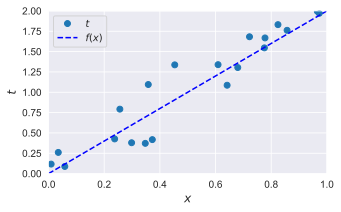

In [2]:
# 输入量 x，20个随机数
x = np.random.uniform(0, 1, 20)
Nx=x.shape[0]
sigma_2 = 0.2  # 正态分布的方差


def f(x): 
    return x * 2

noise = np.random.randn(Nx) * sigma_2
# 输出量
t = f(x) + noise



# 绘制x-t的散点图
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.legend(loc=2)
plt.show()


### 1.3 损失函数

通过神经网络调整$w$的数值大小，最小化损失函数，优化数学模型$\mathbf{y}=w\mathbf{x}$。

损失函数：均方误差(Mean square error, MSE)

\begin{equation}
L=\frac{1}{N}\sum_{i=1}^{N}(t_i-y_i)^2
\end{equation}

神经网络优化目的（数学）：寻找损失函数的极小值


In [20]:
def neural_network(x, w):
    """输出函数 y = x * w"""
    return x * w

def loss_mse(y, t):
    """均方误差损失函数"""
    return np.mean((t - y)**2)

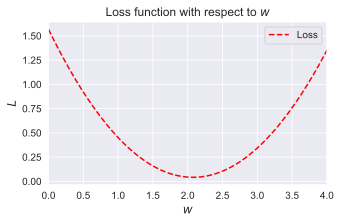

In [10]:
# 绘制损失函数L与参数w的关系

# 思考：为何不直接求解极小值?


# 设定损失函数的参量的范围

ws = np.linspace(0, 4, num=100)  # 权重范畴
# 损失函数的值
loss_ws = np.vectorize(lambda w: loss_mse(neural_network(x, w) , t))(ws)

plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='Loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$L$', fontsize=12)
plt.title('Loss function with respect to $w$')
plt.xlim(0, 4)
plt.legend()
plt.show()

### 1.4 损失函数最小化

本案例的极小值很容易辨识，但在实际神经网络中，由于参量较多，损失函数为高维度，寻找极小值的难度不小。

另外，人眼虽然很容易识别极值，但是计算机不能简单识别。

#### 1.4.1 梯度下降法

训练神经网络常用的算法是梯度下降法（Gradient Descent），计算损失函数的梯度($\partial L/\partial w$)，并沿着梯度下降的方向修正参数。

参数$w$参数的修改与损失函数的梯度成正比。

即在第$k$次迭代中，
$$
w(k+1)=w(k)-\Delta w(k) = w(k)-\eta\frac{\partial L}{\partial w}
$$
其中$\eta$为步长或学习率(learning rate)。

思考：学习率的单位是什么？是否可用无量纲的学习率？

损失函数的梯度可用链式法则计算

思考：为什么要坚持用链式法则？

\begin{align}
\frac{\partial L}{\partial w} &= \sum_{i=1}^N\frac{\partial L}{\partial y_i}\frac{\partial y_i}{\partial w} \\
&=\frac{1}{N}\sum_{i=1}^N 2x_i(y_i-t_i)
\end{align}

$$
\frac{\partial L}{\partial y_i} = 2(y_i-t_i)
$$

$$
\frac{\partial y_i}{\partial w} = x_i
$$



w(0): 0.6801 	 loss: 0.7316
w(1): 1.1740 	 loss: 0.3300
w(2): 1.4932 	 loss: 0.1623
w(3): 1.6995 	 loss: 0.0922
w(4): 1.8328 	 loss: 0.0630
w(5): 1.9189 	 loss: 0.0508
w(6): 1.9746 	 loss: 0.0457
w(7): 2.0106 	 loss: 0.0435
w(8): 2.0338 	 loss: 0.0426
w(9): 2.0489 	 loss: 0.0423
w(10): 2.0586 	 loss: 0.0421


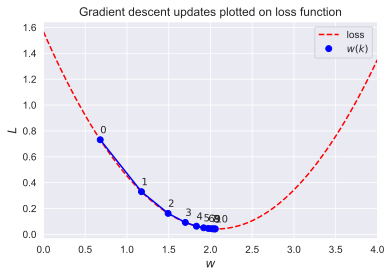

In [16]:
def gradient(w, x, t):
    """梯度函数 """
    return 2 * x * (neural_network(x, w) - t)


def delta_w(w_k, x, t, eta):
    """dw"""
    return eta * np.mean(gradient(w_k, x, t))


# 参数初始化（随机）
w = np.random.rand()
# 设置学习率
eta = 0.9
N_iter = 10  # 迭代次数
w_loss = [(w, loss_mse(neural_network(x, w), t))] # 记录权重和损失函数 
for i in range(N_iter):
    dw = delta_w(w, x, t, eta)  
    w = w - dw  # 更新权重
    w_loss.append((w, loss_mse(neural_network(x, w), t)))  #保存权重和损失函数的值

# 显示：权重和损失函数
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')
    
# 梯度下降法的可视化
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # 损失函数曲线
# Plot the updates
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$') # 标记迭代状态
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$L$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()

# 思考：如果需要设计完整的收敛，如何检测是否到达极致，如何设置退出机制？

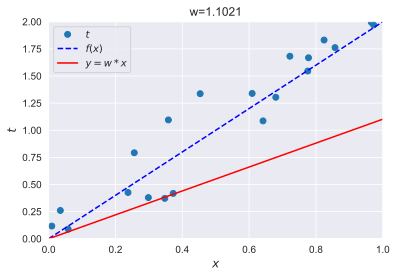

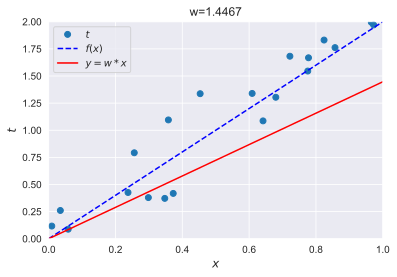

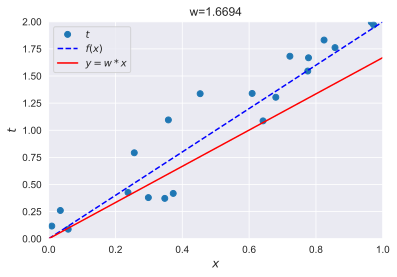

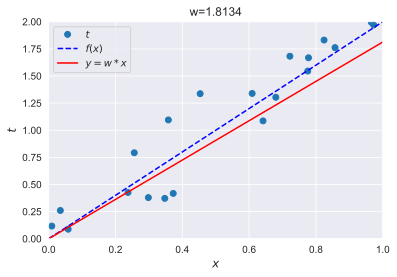

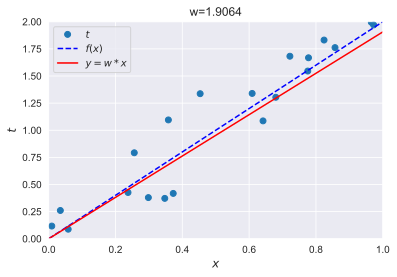

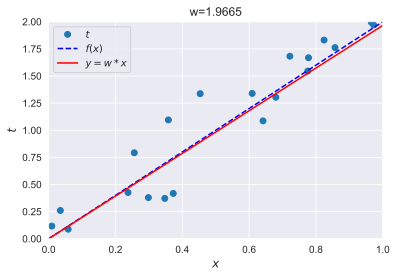

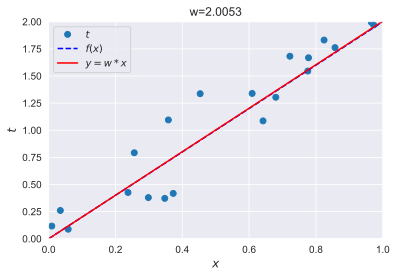

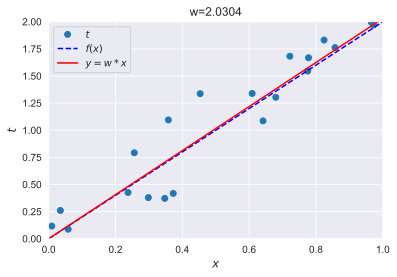

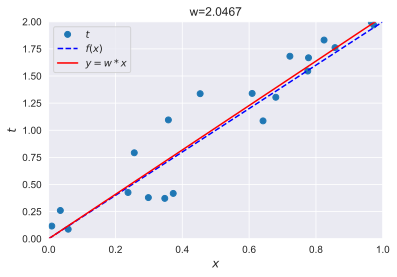

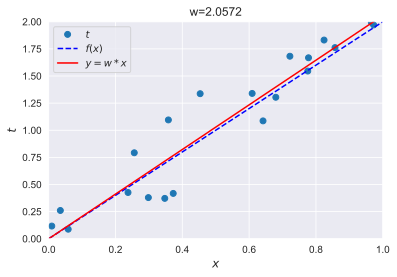

In [18]:
w = np.random.rand()
N_iter = 10  # 最大的迭代次数
# 修改学习率，可视化学习结果！
for i in range(N_iter):
    dw = delta_w(w, x, t, eta)  # 权重的修正值
    w = w - dw  # 修正权重

    # 可显示动态修正过程
    plt.figure(figsize=(6, 4))
    # Plot the target t versus the input x
    plt.plot(x, t, 'o', label='$t$')
    # 目标模型
    plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
    # 绘制当前权重w状态下
    plt.plot([0, 1], [0*w, 1*w], 'r-', label='$y = w * x$')
    plt.xlabel('$x$', fontsize=12)
    plt.ylabel('$t$', fontsize=12)
    plt.title(f'w={w:.4f}')
    plt.legend(loc=2)
    plt.ylim(0, 2)
    plt.xlim(0, 1)
    plt.show()